In [6]:
# Input File :  25062023 All 5 Filters SP500 +-10%.ipyb file
# ['ATO', 'BIO', 'CAG', 'CLX', 'CMG', 'DG', 'ED', 'K', 'KDP', 'MRK', 'NEM', 'PCG', 'SJM', 'TAP']

In [7]:
# https://riskfolio-lib.readthedocs.io/en/latest/plot.html

In [8]:
#!pip install riskfolio-lib
#!pip install yfinance

In [9]:
#!pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
import riskfolio as rp

In [10]:
# Date range
start = '2023-03-24'
end = '2023-07-24'

# Tickers of assets
tickers =['ATO', 'BIO', 'CAG', 'CLX', 'CMG', 'DG', 'ED', 'K', 'KDP', 'MRK', 'NEM', 'PCG', 'SJM', 'TAP']
tickers.sort()

In [11]:
# Downloading the data
data = yf.download(tickers, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = tickers
assets = data.pct_change().dropna()

Y = assets

# Creating the Portfolio Object
port = rp.Portfolio(returns=Y)

# To display dataframes values in percentage format
pd.options.display.float_format = '{:.4%}'.format

# Choose the risk measure
rm = 'MSV'  # Semi Standard Deviation

# Estimate inputs of the model (historical estimates)
method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate the portfolio that maximizes the risk adjusted return ratio
w1 = port.optimization(model='Classic', rm=rm, obj='Sharpe', rf=0.0, l=0, hist=True)

# Estimate points in the efficient frontier mean - semi standard deviation
ws = port.efficient_frontier(model='Classic', rm=rm, points=20, rf=0, hist=True)

# Estimate the risk parity portfolio for semi standard deviation
w2 = port.rp_optimization(model='Classic', rm=rm, rf=0, b=None, hist=True)

[*********************100%***********************]  14 of 14 completed


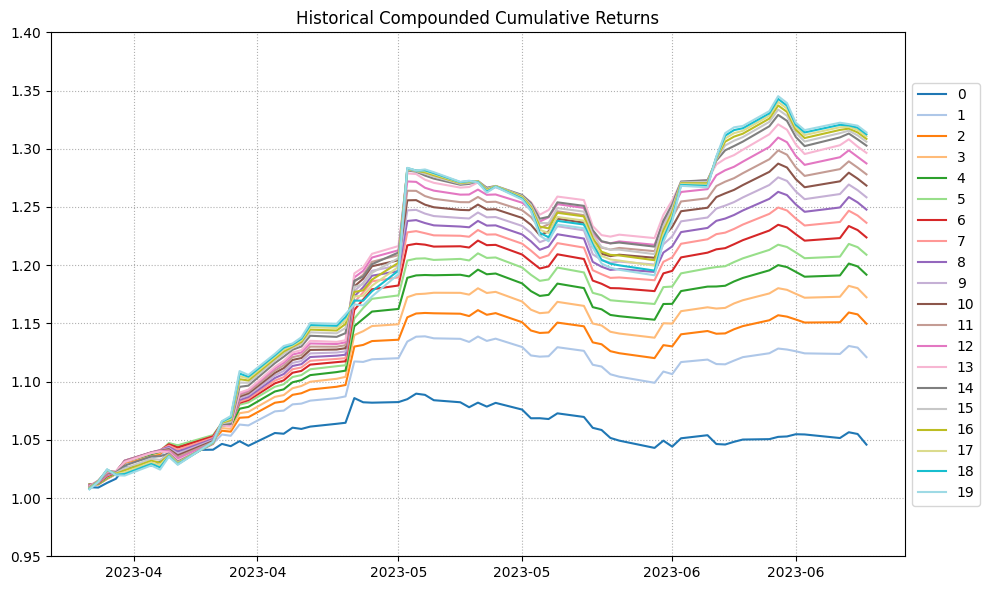

In [12]:
ax = rp.plot_series(returns=Y, w=ws, cmap='tab20', height=6, width=10,
                    ax=None)

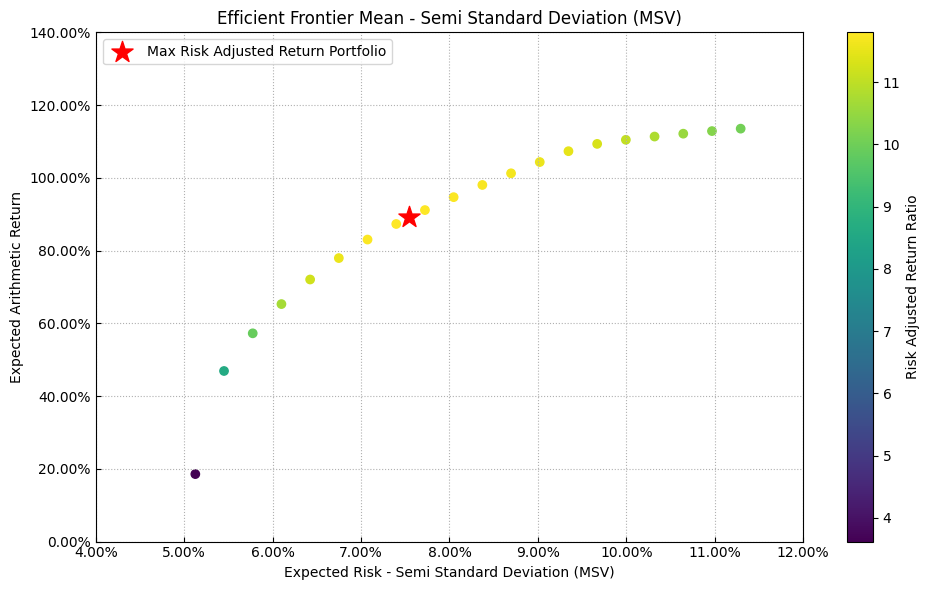

In [13]:
label = 'Max Risk Adjusted Return Portfolio'
mu = port.mu
cov = port.cov
returns = port.returns

ax = rp.plot_frontier(w_frontier=ws, mu=mu, cov=cov, returns=returns,
                       rm=rm, rf=0, alpha=0.05, cmap='viridis', w=w1,
                       label=label, marker='*', s=16, c='r',
                       height=6, width=10, t_factor=252, ax=None)

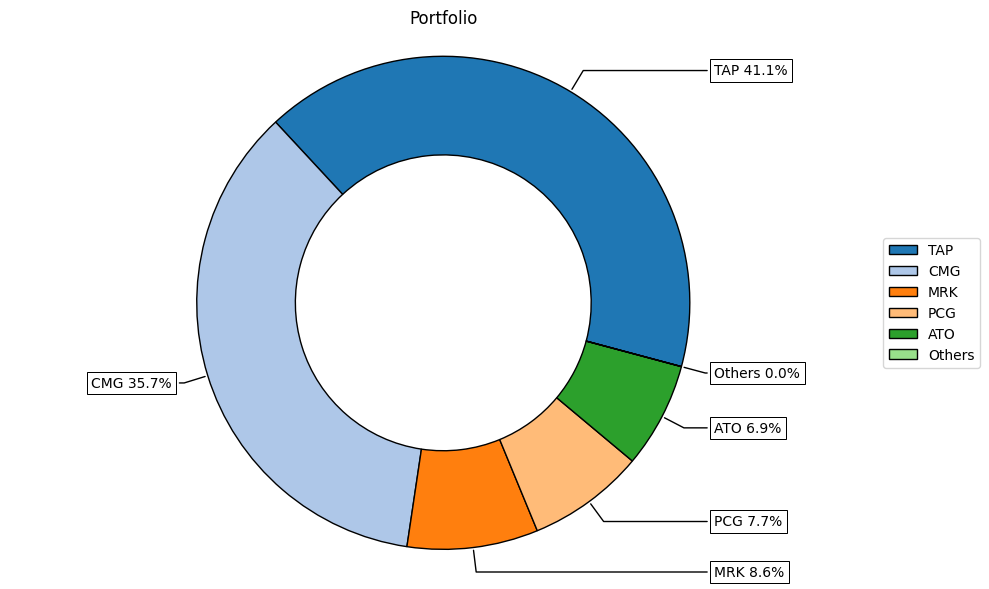

In [14]:
ax = rp.plot_pie(w=w1, title='Portfolio', height=6, width=10,
                 cmap="tab20", ax=None)

AttributeError: 'DataFrame' object has no attribute 'append'

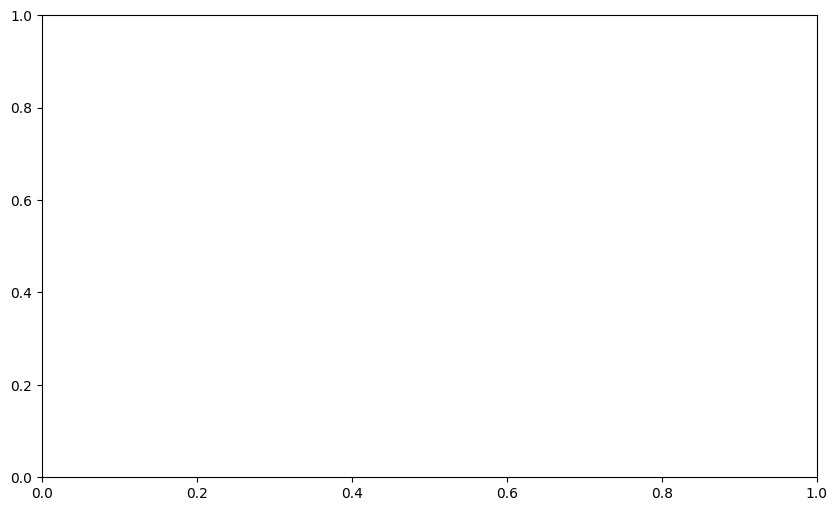

In [15]:
ax = rp.plot_bar(w1, title='Portfolio', kind="v", others=0.05,
                 nrow=25, height=6, width=10, ax=None)

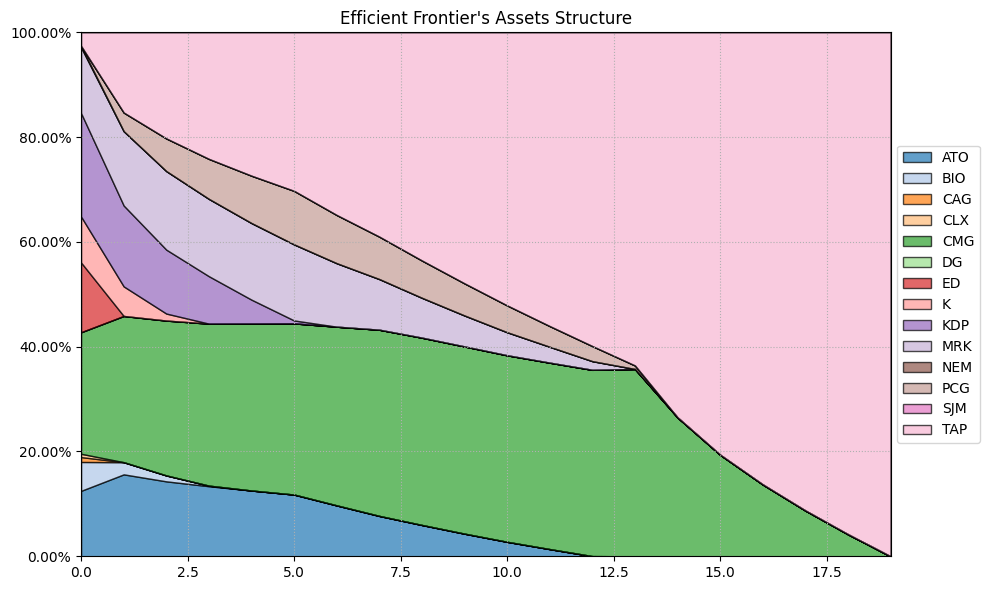

In [16]:
ax = rp.plot_frontier_area(w_frontier=ws, cmap="tab20", height=6,
                           width=10, ax=None)

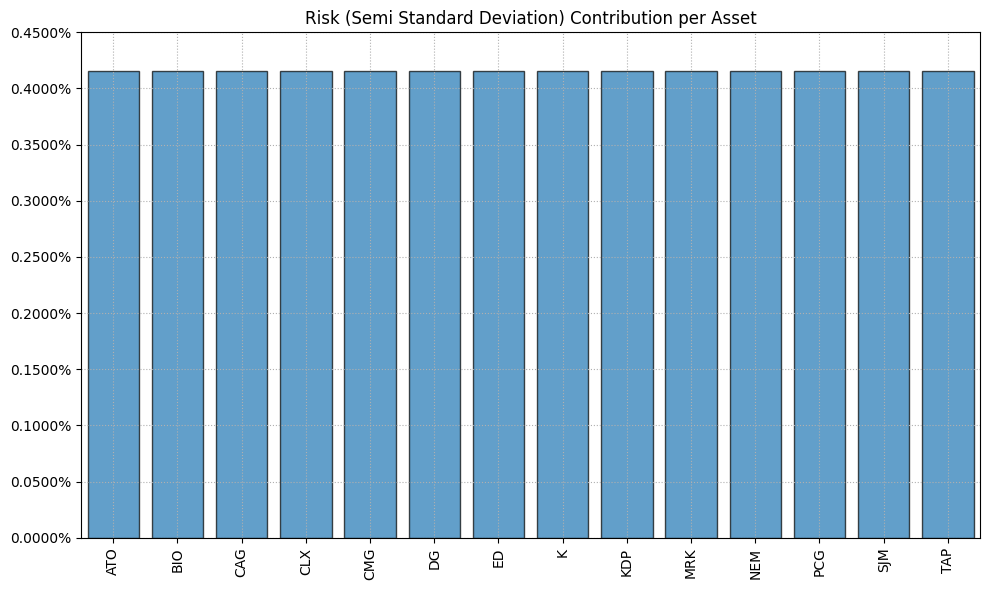

In [17]:
ax = rp.plot_risk_con(w=w2, cov=cov, returns=returns, rm=rm,
                      rf=0, alpha=0.05, color="tab:blue", height=6,
                      width=10, t_factor=252, ax=None)

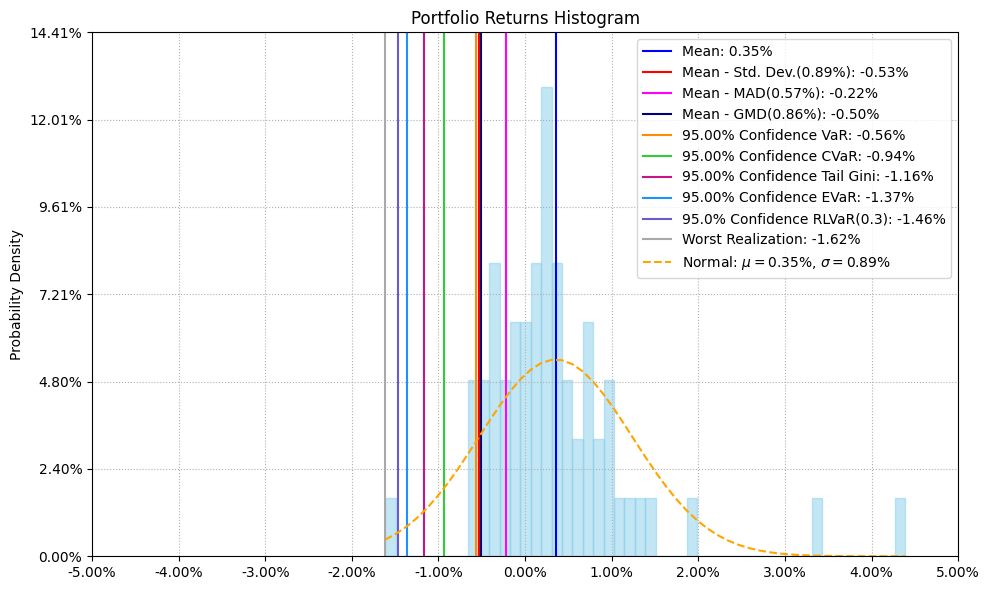

In [18]:
ax = rp.plot_hist(returns=Y, w=w1, alpha=0.05, bins=50, height=6,
                  width=10, ax=None)

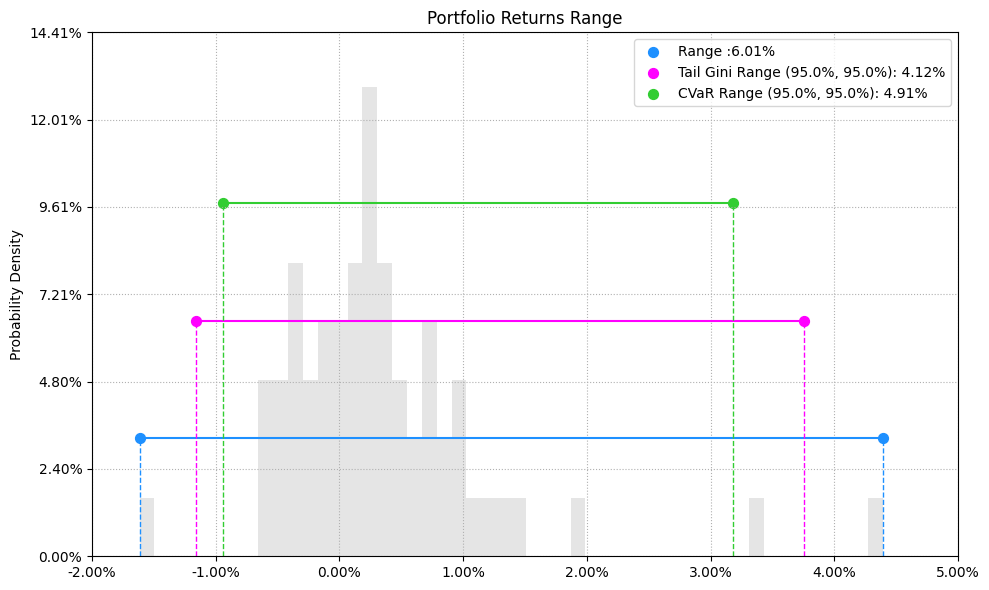

In [19]:
ax = rp.plot_range(returns=Y, w=w1, alpha=0.05, a_sim=100, beta=None,
                b_sim=None, bins=50, height=6, width=10, ax=None)

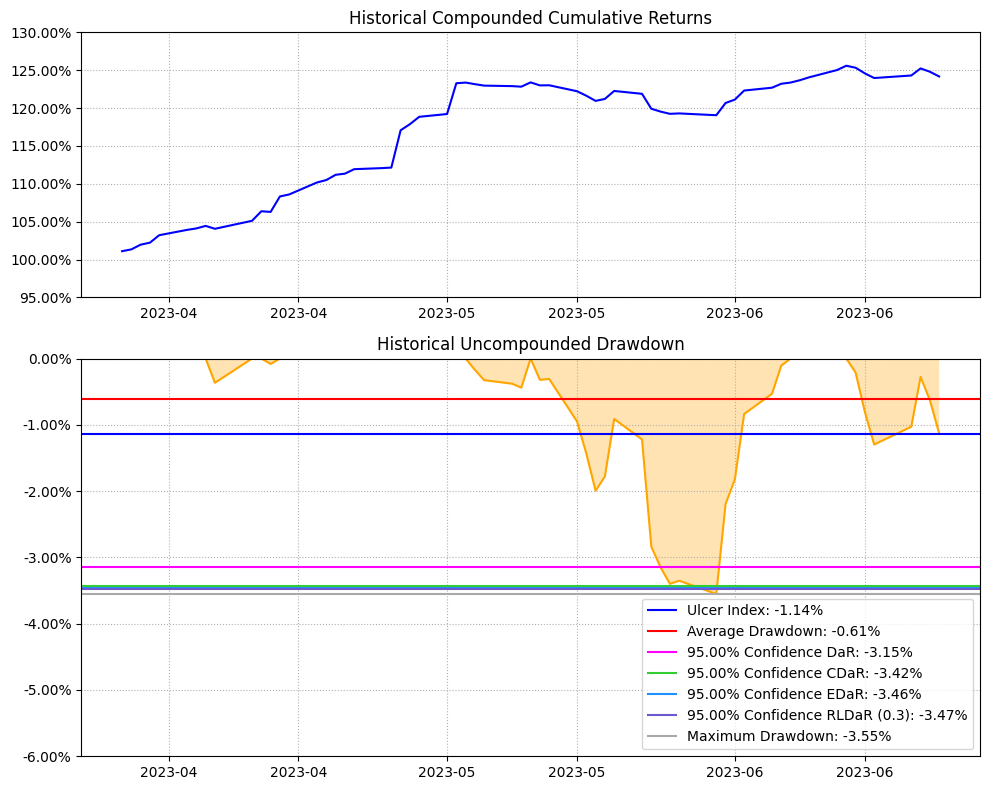

In [20]:
ax = rp.plot_drawdown(returns=Y, w=w1, alpha=0.05, height=8, width=10, ax=None)

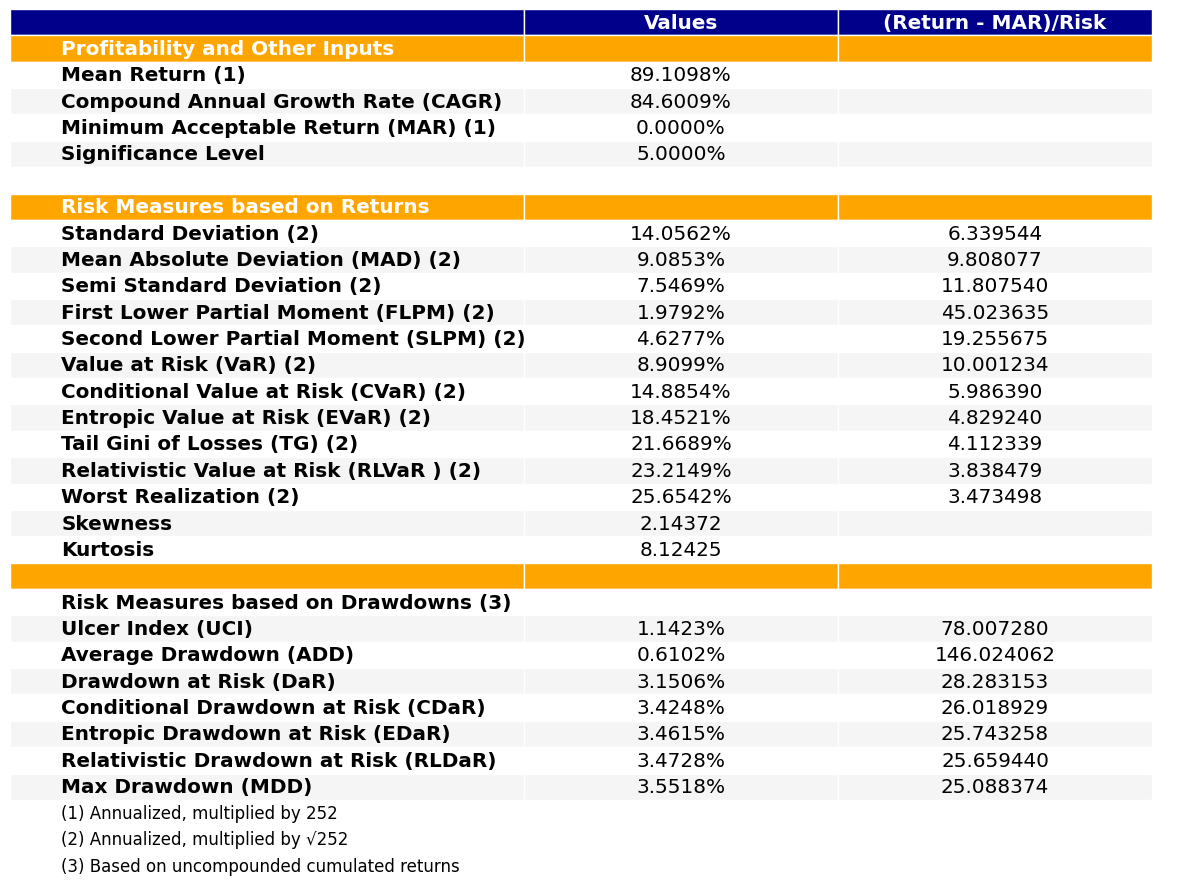

In [21]:
ax = rp.plot_table(returns=Y, w=w1, MAR=0, alpha=0.05, ax=None)

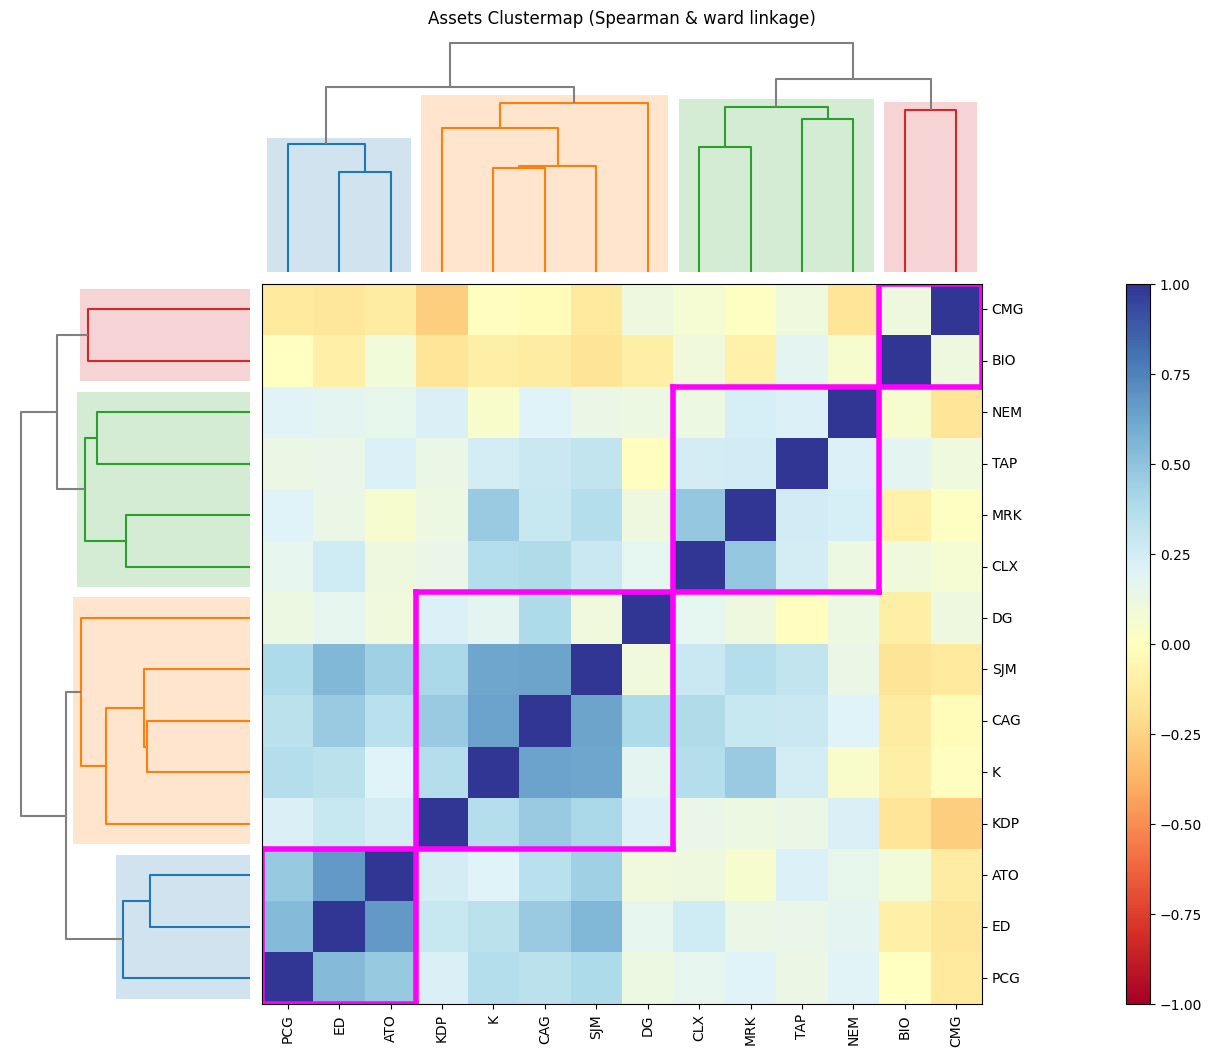

In [22]:
ax = rp.plot_clusters(returns=Y, codependence='spearman',
                      linkage='ward', k=None, max_k=10,
                      leaf_order=True, dendrogram=True, ax=None)

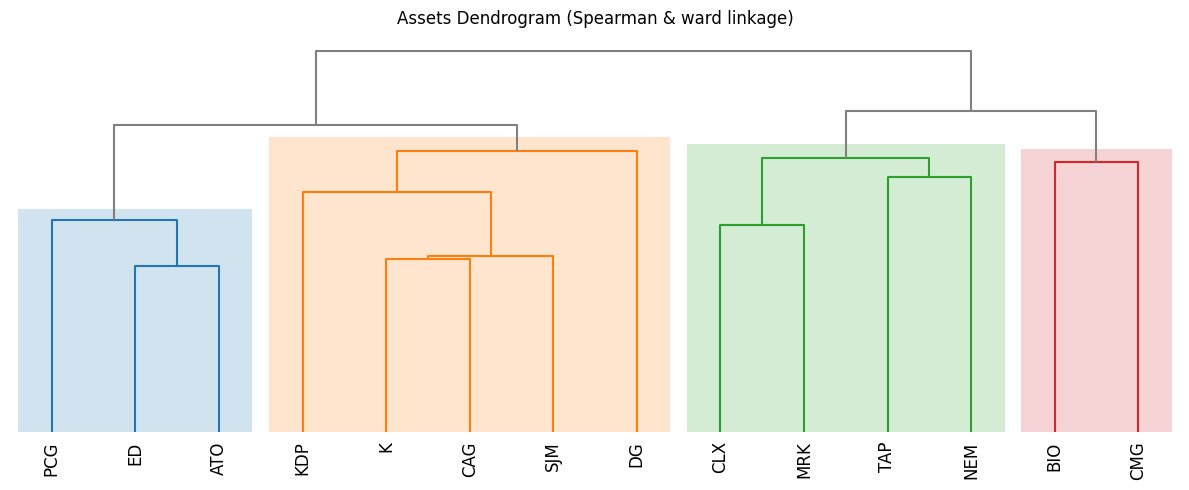

In [23]:
ax = rp.plot_dendrogram(returns=Y, codependence='spearman',
                        linkage='ward', k=None, max_k=10,
                        leaf_order=True, ax=None)

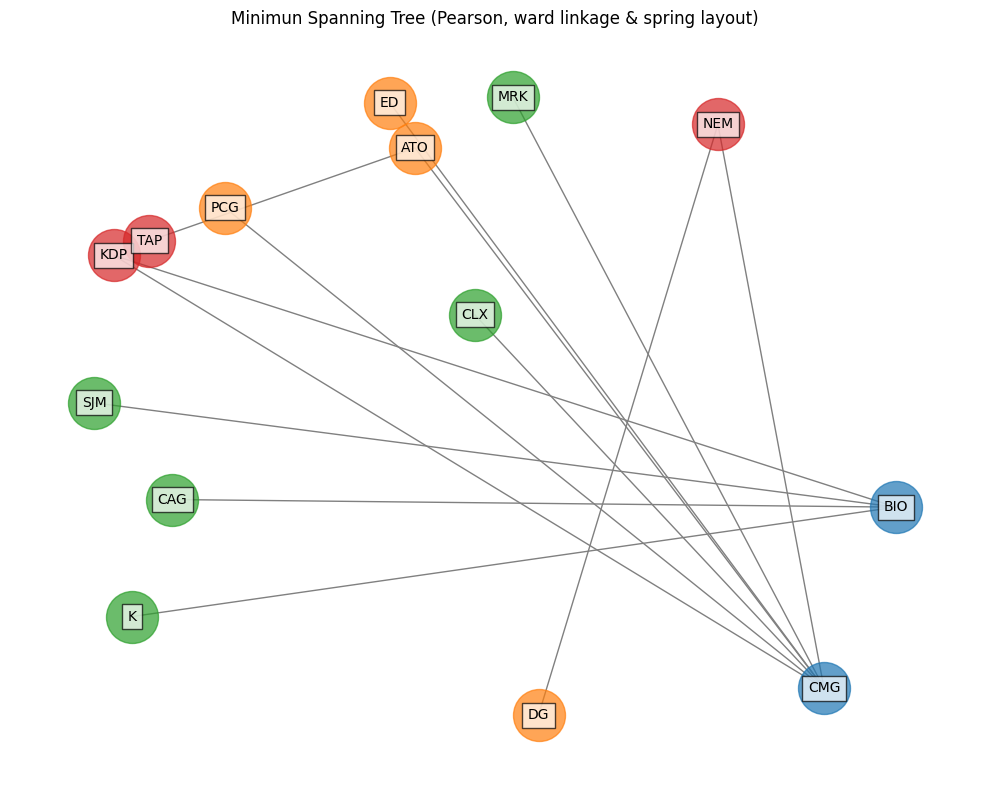

In [24]:
ax = rp.plot_network(returns=Y, codependence="pearson",
                     linkage="ward", k=None, max_k=10,
                     alpha_tail=0.05, leaf_order=True,
                     kind='spring', ax=None)

In [ ]:
#########################################  THE END ######################